# <center> Transient Search with Difference Image Analysis </center>

###  <center> Bruno Sánchez, M. Domínguez, M. Lares </center>

####  <center> Friends of Friends Meeting </center>
####  <center> Córdoba 2017 </center>

## A transient is...
-------------------------------------

**Any astrophysical phenomena which happens only once and then decays**


<center><img src="plots/Supernova_Image_Light_Curve_Spectrum_Illustration_of.gif" width=600></center>

## A transient can be detected when...
-------------------------------------

**We have data for two different epochs, and we compare them directly**

$\Gamma \ ( \vec{D_{t_i}} \ , \vec{D_{t_{i+1}}} \ )$
 ---------------------------------------------------

*Our data are images taken from ground telescopes*


**But what kind of function is $\Gamma$??**


## *Difference Image Analysis* (DIA)

$$  Diff = \Gamma \ ( \ Ref, \ New \ )$$  &nbsp;


<center>To compare we need a model for the images, and to choose the correct representation of data...</center>

* Alard & Lupton 1998: "A Method for Optimal Image Subtraction"

    $$ R \ (x, y) \ \otimes \ K \ (u, v) \cong N(x, y) $$
    
    $$ D = N - R \otimes \mathscr{F}^{-1} \left( \frac{\widehat{N}}{\widehat{R}} \right) $$ 


Linearized model with *basis functions*:   
 
$$ K \ (u, v) = \sum\limits_{n} a_n \ N(\mu=0, \sigma_u, \sigma_v) \ p_u(u) \ p_v(v) $$

$$Q = \sum \lvert N - (Ref \otimes K) \rvert^2 $$

* Bramich 2008: "A new algorithm for difference image analysis"

    $$ N_{ij}=\sum\limits_{l, m} K_{lm}R_{i+l, j+m}  + B_0 $$

* Zackay, Ofek, Gal-Yam (2016) $$R(x, y) = T(x, y) \otimes P_R(u, v, x, y)  + \epsilon_R $$

$$ N(x, y) = T(x, y) \otimes P_N(u, v, x, y)  + \epsilon_N $$ 

<center>**Hypothesis test:**</center>


$$ N_{|H_0}(x, y) = T(x, y) \otimes P_N(u, v)  + \epsilon_N $$

$$ N_{|H_1(q, \alpha)}(x, y) = (T(x, y) + \alpha \delta_q(x,y)) \otimes P_N(u,v) + \epsilon_N $$

<center>The *likelihood ratio* of this binary test:</center>


$$ \mathcal{L} (q, \alpha) = \frac{\mathcal{P}(N, R | \mathcal{H}_0)}{\mathcal{P}(N, R | \mathcal{H}_1(q, \alpha))} $$

<center>Maximising the *likelihood* is the same as to maximize the statistic $S$:</center>


$$ \widehat{S} \equiv \widehat{\frac{1}{\alpha} \log{\mathcal{L}}} $$


<center>which is calculated for every $\alpha$ value simultaneously</center>

<center>How to calculate $S$?</center>

$$S(x, y) = \frac{1}{\sigma^2}\sum\limits_{u,v} P(u-x, v-y) N(u,v)$$

>We can say that $S$ is the *matched filter* of the image with its own $P$, and it is a Hypothesis testing image **pixel by pixel**

Something new...?
--------------------

Source Extractor (Bertin) already was performing matched filter in source detection...

The difference lies in the expression for the image subtraction result. 

S can be calculated (and *much faster*) by going to *Fourier* space:

$$\widehat{S} = \frac{1}{\sigma^2} \ \lvert \overline{\widehat{P}} \rvert^2 \ \widehat{N} $$

And as a free bonus we can check the optimal coaddition frame:

$$\widehat{R} = \frac{\sum_j \frac{F_j}{\sigma_j^2} \overline{\widehat{P_j}} \widehat{N_j}}
		   {\sqrt{\sum_j \frac{F_j^2}{\sigma_j^2} |\widehat{P_j}|^2} } $$

Which is just the sum of each $\widehat{S}$:

$$\widehat{R} = \frac{\sum_j F_j \ \widehat{S}_j}
		   {\sqrt{\sum_j \frac{F_j^2}{\sigma_j^2} |\widehat{P_j}|^2} }$$

>And (*finally*) the expression for the difference image

> $$ \widehat{D} = \frac{F_R \widehat{P_R} \widehat{N} - F_N \widehat{P_N} \widehat{R}}
   {\sqrt{\sigma_N^2 F_R^2 |\widehat{P_R}|^2 + \sigma_R^2 F_N^2 |\widehat{P_N}|^2 }}  $$

Which has great properties:
* Is symmetric 
* Runs much faster sins this can be done in Fourier space
* We don't degrade a high quality R image, we take advantage of its information

>And (*finally*) the expression for the difference image

> $$ \widehat{D} = \frac{F_R \widehat{P_R} \widehat{N} - F_N \widehat{P_N} \widehat{R}}
   {\sqrt{\sigma_N^2 F_R^2 |\widehat{P_R}|^2 + \sigma_R^2 F_N^2 |\widehat{P_N}|^2 }}  $$

And of course some drawbacks:
* You still have to measure the Psf
* There is no information for variable Psf treatment

## The need for Machine Learning



DIA is used every night on thousands of images of many many collaborations

Sometimes (always actually), something goes wrong, and subtractions looks bad. 

Even if the telescope and CCD are giving good images.

There is a wide range of posible causes to this:
* Bad image registration
* Different photometric conditions
* Saturated stars in the field
* Satellite trails
* Ghosts in CCD charge dispersion, or readout
* Star bleedings
* Etc...

Example of a poor subtraction:

<img src='plots/diff_4-3.png'>

Example of a fairly good subtraction:

<img src='plots/diff_5-4.png'>

Example of the very same done better:

<img src='plots/diff_5-4_noalign.png'>

If we identify sources here we find two classes of objects:

Reals

------------------
* The real transient targets
* They should look just like a star

In [11]:
import numpy as np
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt 

%matplotlib inline

In [12]:
cat_beta = ascii.read('./plots/img00175/cat_beta', format='sextractor')
cat_nobeta = ascii.read('./plots/img00175/cat_nobeta', format='sextractor')

/home/bruno/.virtualenvs/iPTF/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


(600, 800)

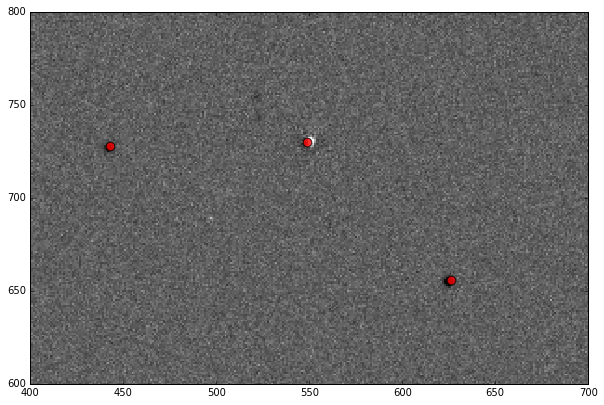

In [79]:
plt.figure(figsize=(10, 11))
plt.imshow(np.log10(fits.getdata('./plots/img00175/new_diff_nobeta.fits')+10.), vmin=0.5,  vmax=1.3, interpolation='none', cmap='gray_r')
plt.scatter(cat_beta['X_IMAGE'], cat_beta['Y_IMAGE'], c='red', s=300, marker='.', alpha=0.8)
plt.xlim(400, 700)
plt.ylim(600, 800)